<a href="https://colab.research.google.com/github/SafiUllahAdam/DataScienceTask_GreatWinchester/blob/main/Safi_Ullah_ML_Heart_Disease_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

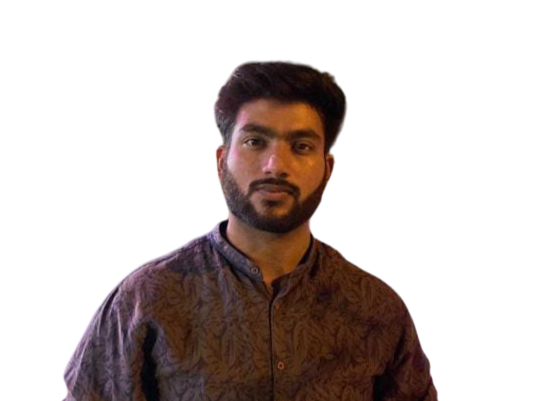

# **My name is Muhammad Safi Ullah Adam and I have done Bachelor of Science in Computer Engineering from National University of Technology NUTECH, Islamabad**

# **Contact: +92-318-7696133**

# **Email: safiadam229@gmail.com**

# **Predicting Heart Disease using Machine Learning**

This file will introduce some foundation machine learning and data science concepts by exploring the problem of heart disease classification which I am doing for our Organization

It is intended to be an end-to-end real-time project of what a data science and machine learning application can do

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


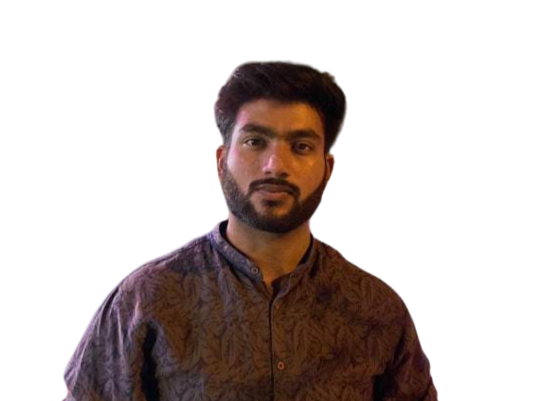

In [2]:
import os
import cv2
from google.colab.patches import cv2_imshow  # Use cv2_imshow to display images in Colab

# Change directory to access the image from Google Drive
os.chdir("/content/drive")

# Read the image from the given path
img = cv2.imread("/content/drive/MyDrive/Data/images/Safi_Ullah_Picture.png")

# Display the image
cv2_imshow(img)

#print(img) Print this for pixels of image


# Optionally resize the image if it's too large
# resized_img = cv2.resize(img, (600, 500))  # Resize the image
# cv2_imshow(resized_img)  # Display the resized image



# **| 6 Step Machine Learning Modelling Framework |**
More specifically, we'll look at the following topics.

1. Exploratory data analysis (EDA) - the process of going through a dataset and finding out more about it.

2. Model training - create model(s) to learn to predict a target variable based on other variables.

3. Model evaluation - evaluating a models predictions using problem-specific evaluation metrics.

4. Model comparison - comparing several different models to find the best one.

5. Model fine-tuning - once we've found a good model, how can we improve it?

6. Feature importance - since we're predicting the presence of heart disease, are there some things which are more important for prediction?

7. Cross-validation - if we do build a good model, can we be sure it will work on unseen data?

8. Reporting what we've found - if we had to present our work, what would we show someone?

To work through these topics, we'll use pandas, Matplotlib and NumPy for data anaylsis, as well as, Scikit-Learn for machine learning and modelling tasks.

#                      **Preparing the tools**

---



At the start of any project, it's custom to see the required libraries imported in a big chunk like you can see below.

However, in practice, your projects may import libraries as you go. After you've spent a couple of hours working on your problem, you'll probably want to do some tidying up. This is where you may want to consolidate every library you've used at the top of your notebook (like the cell below).

The libraries you use will differ from project to project. But there are a few which will you'll likely take advantage of during almost every structured data project.

1. Pandas for data analysis.
2. NumPy for numerical operations.
3. Matplotlib/seaborn for plotting or data visualization.
4. Scikit-Learn for machine learning modelling and evaluation.

In [3]:
# Regular EDA and plotting libraries
import numpy as np # np is short for numpy
import pandas as pd # pandas is so commonly used, it's shortened to pd
import matplotlib.pyplot as plt
import seaborn as sns # seaborn gets shortened to sns

# We want our plots to appear in the notebook instead of seperate window
# %matplotlib inline

## Models
from sklearn.linear_model import LogisticRegression


## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score


# Print last updated
import time
print(f"Last updated: {time.asctime()}")

Last updated: Sun Oct 27 10:01:50 2024


# **Load Data**

There are many different kinds of ways to store data. The typical way of storing tabular data, data similar to what we'd see in an Excel file is in .csv format. .csv stands for comma seperated values.

Pandas has a built-in function to read .csv files called read_csv() which takes the file pathname of your .csv file. You'll likely use this a lot.

In [4]:
import os
import cv2
from google.colab.patches import cv2_imshow  # Use cv2_imshow to display images in Colab

# Change directory to access the image from Google Drive
os.chdir("/content/drive")

# Read the dataset from the given path of Drive

df = pd.read_csv("/content/drive/MyDrive/Data/Datasets/heart dataset.csv") # 'DataFrame' shortened to 'df'

# Let's check the top 5 rows of our dataframe
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# And the top 10
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


**value_counts() allows you to show how many times each of the values of a categorical column appear.**

In [6]:
# Let's see how many positive (1) and negative (0) samples we have in our dataframe
df.target.value_counts()

,count
target,
1,165
0,138


Since these two values are close to even, our *target* column can be considered balanced. An unbalanced *target* column, meaning some classes have far more samples, can be harder to model than a balanced set. Ideally, all of our target classes have the same number of samples.

If we'd prefer these values in percentages, value_counts() takes a parameter, normalize which can be set to true.

In [7]:
# Normalized value counts
df.target.value_counts(normalize=True)

# This tells us how balanced our dataset is. If one class (either 0 or 1) is much larger than the other,
# our model might become biased toward the larger class. In this case, the dataset is fairly balanced since both classes are close in proportion (around 55% vs. 45%).



,proportion
target,
1,0.544554
0,0.455446


We can plot the target column value counts by calling the plot() function and telling it what kind of plot we'd like, in this case, bar is good.



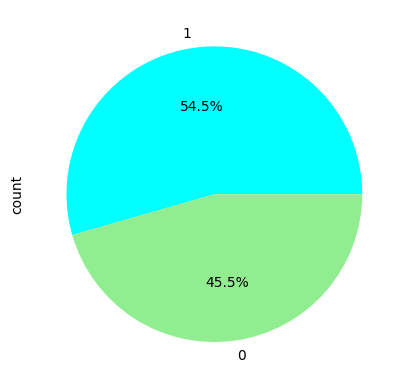

In [8]:
# Plot the value counts with a bar graph
df.target.value_counts().plot(kind="pie", autopct='%1.1f%%', colors=["cyan", "lightgreen"]);


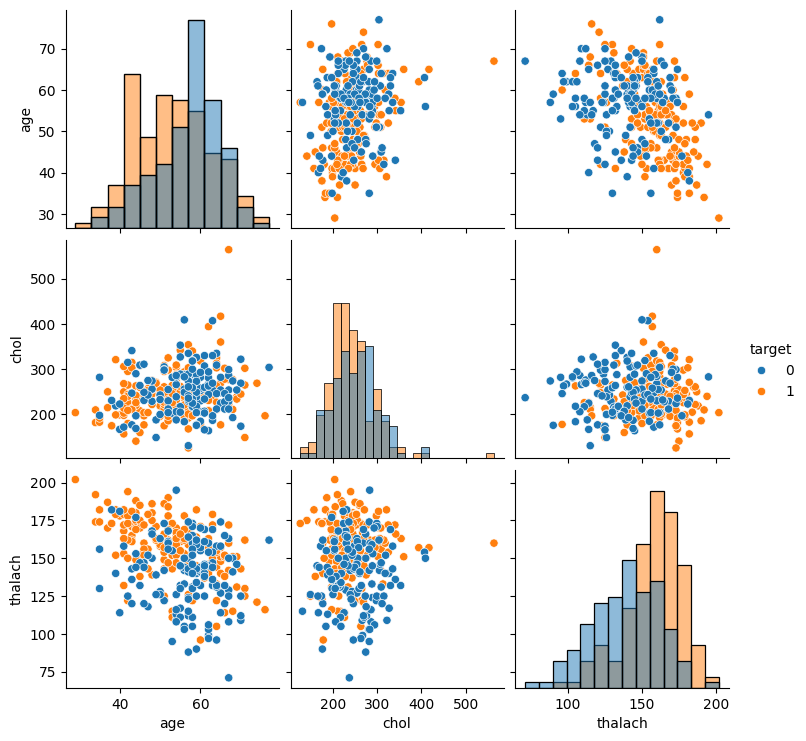

In [9]:
# Select a subset of the dataset to avoid overcrowding the plot
# Use important features like age, cholesterol, and target
sns.pairplot(df[['age', 'chol', 'thalach', 'target']], hue='target', diag_kind='hist')
plt.show()


#This plot is useful for visualizing how different features (like age, cholesterol, and heart rate) are related to each other and how they vary with the target (heart disease).



The pair plot shows the relationships between age, cholesterol (chol), and maximum heart rate (thalach), with colors representing heart disease presence (target=1 in orange) and absence (target=0 in blue). You can observe different distributions and patterns, such as people with higher heart rates (thalach) having a higher likelihood of heart disease (orange points are more concentrated at higher thalach values).








In [10]:
df.info()

# df.info() shows a quick insight to the number of missing values we have and what type of data we're working with.

# In our case, there are no missing values and all of our columns are numerical in nature.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# **Heart Disease Frequency according to Gender**

If we want to compare two columns to each other, we can use the function pd.crosstab(column_1, column_2).

This is helpful if we want to start gaining an intuition about how our independent variables interact with your dependent variables.

Let's compare our target column with the sex column.

Remember from our data dictionary, for the target column, 1 = heart disease present, 0 = no heart disease. And for sex, 1 = male, 0 = female.

In [11]:
df.sex.value_counts()

# for the target column, 1 = heart disease present, 0 = no heart disease. And for sex, 1 = male, 0 = female.

,count
sex,
1,207
0,96


There are 207 males and 96 females in our study.



In [12]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

# This helps us see the distribution of gender in our data, which can be useful for further analysis, such as understanding heart disease frequency by gender.


sex,0,1
target,,
0,24,114
1,72,93


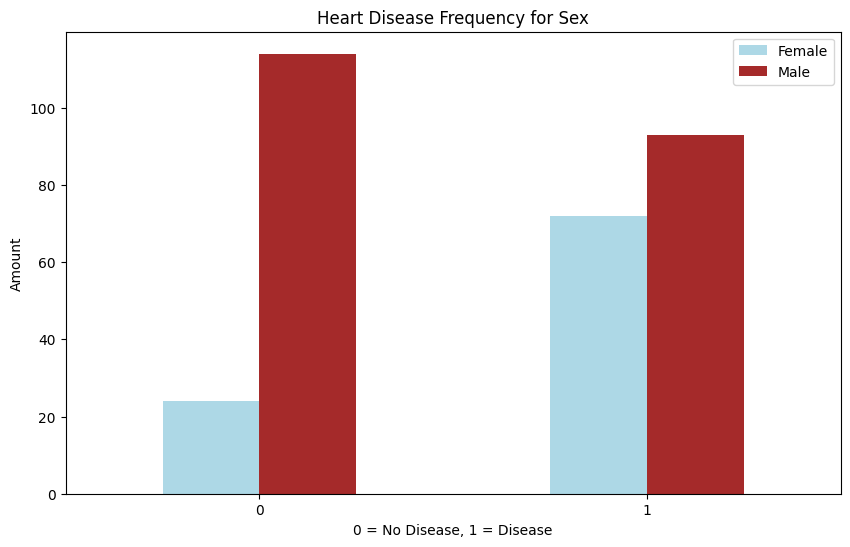

In [13]:
# Create a plot
pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(10,6), color=["lightblue", "brown"])  # The pd.crosstab function creates a table that shows the frequency of values between two categorical variables, helping to compare their relationship.



# Add some attributes to it
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0); # keep the labels on the x-axis vertical

# **Age vs Max Heart rate for Heart Disease**
Let's try combining a couple of independent variables, such as, age and thalach (maximum heart rate) and then comparing them to our target variable heart disease.

Because there are so many different values for age and thalach, we'll use a scatter plot.

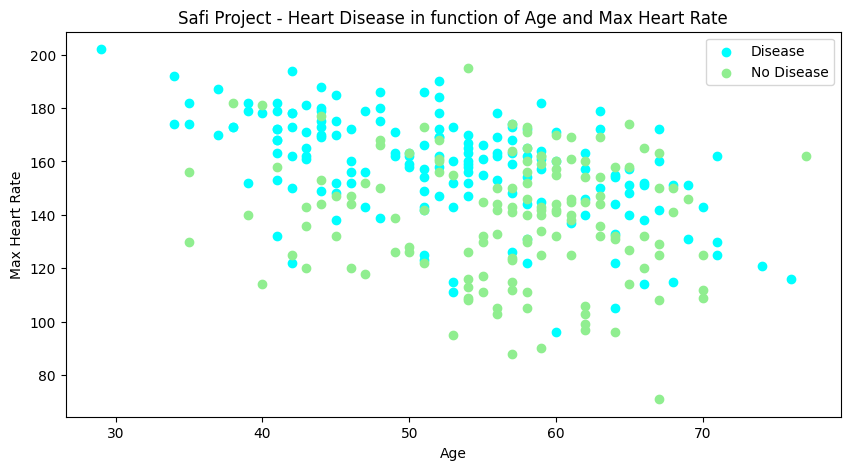

In [14]:
# Create another figure
plt.figure(figsize=(10,5))

# Start with positve examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="cyan") # define it as a scatter figure

# Now for negative examples, we want them on the same plot, so we call plt again
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightgreen") # axis always come as (x, y)

# Add some helpful info
plt.title("Safi Project - Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Max Heart Rate");

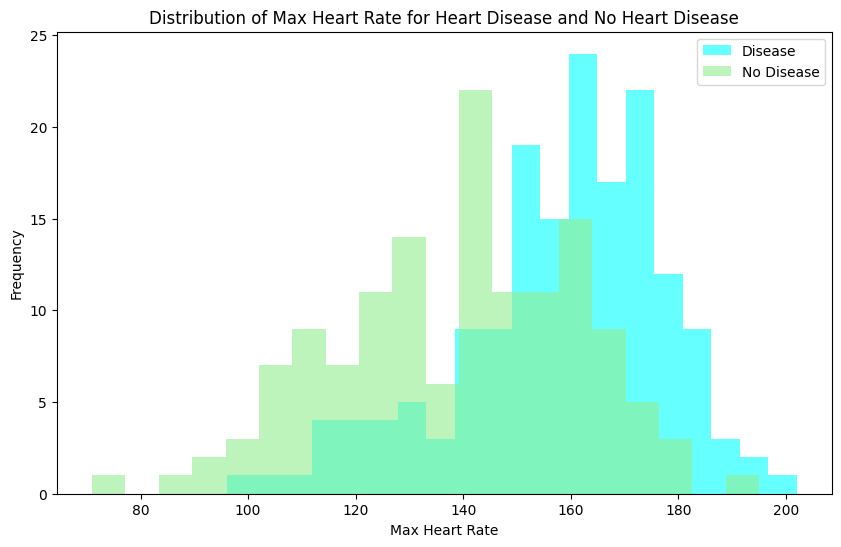

In [15]:
# Set up the plot
plt.figure(figsize=(10,6))

# Histogram for people with heart disease
df.thalach[df.target==1].plot(kind='hist', bins=20, color="cyan", alpha=0.6, label="Disease")

# Histogram for people without heart disease
df.thalach[df.target==0].plot(kind='hist', bins=20, color="lightgreen", alpha=0.6, label="No Disease")

# Adding labels and title
plt.title("Distribution of Max Heart Rate for Heart Disease and No Heart Disease")
plt.xlabel("Max Heart Rate")
plt.ylabel("Frequency")
plt.legend()

# Display the plot
plt.show()


This code creates overlapping histograms to compare the distribution of maximum heart rate (thalach) for people with and without heart disease. It uses different colors to show each group, making it easy to see how max heart rates vary between the two groups.








# **Now Modelling**

We've explored the data, now we'll try to use machine learning to predict our target variable based on the 13 independent variables.

Remember our problem?

Given clinical parameters about a patient, can we predict whether or not they have heart disease?

That's what we'll be trying to answer.

And remember our evaluation metric?

If we can reach 95% accuracy at predicting whether or not a patient has heart disease during this first model, we'll pursure this project and commertialize it.

That's what we'll be aiming for.

But before we build a model, we have to get our dataset ready.

Let's look at it again.

In [16]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


We're trying to predict our target variable using all of the other variables.

To do this, we'll split the target variable from the rest.

In [17]:
# Everything except target variable
X = df.drop("target", axis=1)

# Target variable
y = df.target.values

# In short, this code prepares the data for modeling by separating predictors (X) from the label to be predicted (y).

In [18]:
# Independent variables (no target column)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [19]:
# Targets
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# **Training and test split**

Now comes one of the most important concepts in machine learning, the training/test split.

This is where you'll split your data into a training set and a test set.

You use your training set to train your model and your test set to test it.

The test set must remain separate from your training set.

# **Why not use all the data to train a model?**

Let's say you wanted to take your model into the hospital and start using it on patients. How would you know how well your model goes on a new patient not included in the original full dataset you had?

This is where the test set comes in. It's used to mimic taking your model to a real environment as much as possible.

And it's why it's important to never let your model learn from the test set, it should only be evaluated on it.

To split our data into a training and test set, we can use Scikit-Learn's train_test_split() and feed it our independent and dependent variables (X & y).

In [20]:

# Random seed for reproducibility
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, # independent variables
                                                    y, # dependent variable
                                                    test_size = 0.3) # percentage of data to use for test set


In [21]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
124,39,0,2,94,199,0,1,179,0,0.0,2,0,2
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2
15,50,0,2,120,219,0,1,158,0,1.6,1,0,2
10,54,1,0,140,239,0,1,160,0,1.2,2,0,2
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2


In [22]:

y_train, len(y_train)

(array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
        1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
        0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
        1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
        1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
        1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1]),
 212)

In [23]:
X_test.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [24]:
y_test, len(y_test)

(array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
        1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
        1, 1, 1]),
 91)

And we've got 91 examples we'll test our model(s) on. Let's build some.



In [25]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(max_iter=1000)}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [26]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

{'Logistic Regression': 0.8131868131868132}

# **Model Accuray**

Since we've saved our models scores to a dictionary, we can plot them by first converting them to a DataFrame.

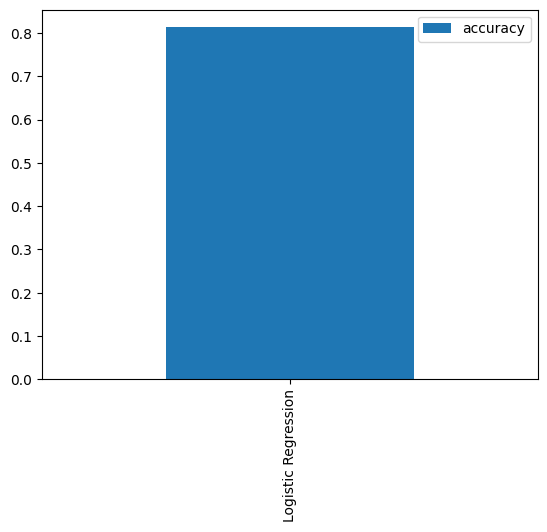

In [27]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

# **Classification report**

We can make a classification report using classification_report() and passing it the true labels as well as our models predicted labels.

A classification report will also give us information of the precision and recall of our model for each class.

In [28]:
# Select the model to make predictions (assuming Logistic Regression was defined and trained)
model = models["Logistic Regression"]
y_preds = model.predict(X_test)

# Show classification report
print(classification_report(y_test, y_preds))


              precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



# **Now Adding K-Nearest Neighbors (KNN) Model**

In [29]:
# Import K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

# Add KNN to the models dictionary
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# Run the fit_and_score function with the updated models dictionary
model_scores = fit_and_score(models=models, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)

# Display model scores
print(model_scores)


{'Logistic Regression': 0.8131868131868132, 'K-Nearest Neighbors': 0.6593406593406593}


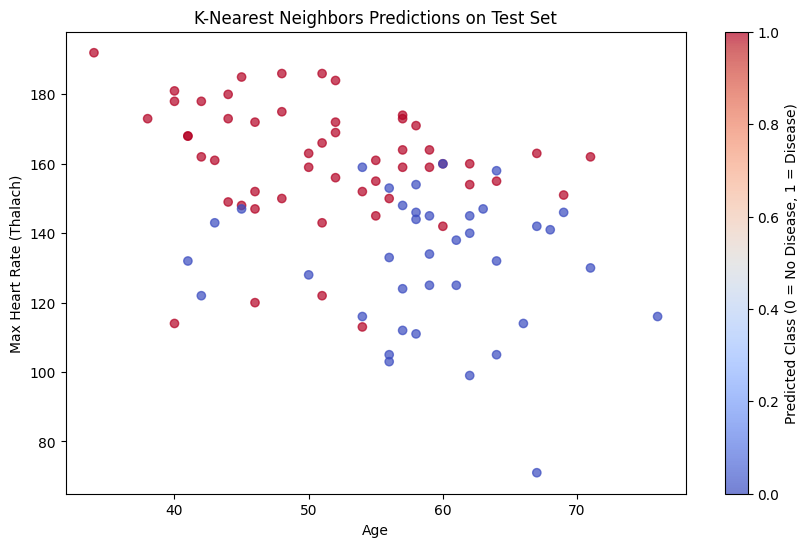

In [30]:
import matplotlib.pyplot as plt

# Make predictions using the trained KNN model
knn_preds = models["K-Nearest Neighbors"].predict(X_test)

# Choose two features to plot (age and thalach for example)
plt.figure(figsize=(10, 6))
plt.scatter(X_test["age"], X_test["thalach"], c=knn_preds, cmap="coolwarm", alpha=0.7)
plt.colorbar(label="Predicted Class (0 = No Disease, 1 = Disease)")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate (Thalach)")
plt.title("K-Nearest Neighbors Predictions on Test Set")
plt.show()


# **Comparison B/W Logistic Regression & KNN Models**

In [31]:
from sklearn.metrics import classification_report

# Logistic Regression classification report
log_reg_model = models["Logistic Regression"]
log_reg_model.fit(X_train, y_train)  # Ensure model is trained
log_reg_preds = log_reg_model.predict(X_test)
print("Logistic Regression Classification Report:\n")
print(classification_report(y_test, log_reg_preds))

# K-Nearest Neighbors classification report
knn_model = models["K-Nearest Neighbors"]
knn_model.fit(X_train, y_train)  # Ensure model is trained
knn_preds = knn_model.predict(X_test)
print("\nK-Nearest Neighbors Classification Report:\n")
print(classification_report(y_test, knn_preds))


Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91


K-Nearest Neighbors Classification Report:

              precision    recall  f1-score   support

           0       0.63      0.59      0.61        41
           1       0.68      0.72      0.70        50

    accuracy                           0.66        91
   macro avg       0.66      0.65      0.65        91
weighted avg       0.66      0.66      0.66        91



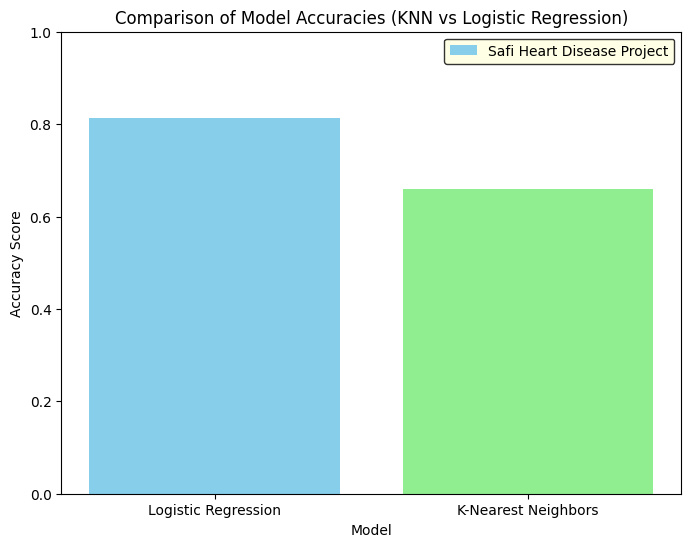

In [34]:
# Define model names and accuracies from model_scores dictionary
model_names = list(model_scores.keys())
model_accuracies = list(model_scores.values()) # model_names and model_accuracies: Created by extracting the keys and values from model_scores.

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(model_names, model_accuracies, color=['skyblue', 'lightgreen'])  # plt.bar(): Plots the accuracy scores for each model with specified colors.
plt.xlabel("Model")
plt.ylabel("Accuracy Score")
plt.title("Comparison of Model Accuracies (KNN vs Logistic Regression)")
plt.ylim(0, 1)

# Add the legend with a custom background color
plt.legend(["Safi Heart Disease Project"], loc="upper right", facecolor="lightyellow", edgecolor="black")
plt.show()



# **CONCLUSION**

# **Based on the accuracy comparison, Logistic Regression outperformed K-Nearest Neighbors (KNN) in predicting heart disease for this dataset. Logistic Regression achieved a higher accuracy, making it a more effective model in this case. This indicates that Logistic Regression may better handle the structure of this dataset, though further model tuning and feature engineering could improve both models' performance**






